# Heart Disease Prediction Using Machine Learning

    This notebook using Python based libraries to analyse some petients' data and aslo uses it to predict whether a patient **has heart disease or not** using the same medical records. 


**STEPS TO BE FOLLOWED**
1. Problem Definition
2. Data
3. What evaluation metrics would mean success?
4. WHat features are we most focused on?
5. Modelling
6. Experimentation

## 1.0 Problem Definition

> Given Clinical parameters about a patient, can we predict whether or not they have heart disease?


## 2.0 Data 

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

original source of data : https://archive.ics.uci.edu/ml/datasets/heart+Disease


**Features**

> NOTE : The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.


## 3.0 Evaluation

> If we can get up to a 95% accuracy and greater, then the model can pursued further and can be taken into production.

## 4.0 Features

This is where you get different information about each of the features of your data.

**Create a data dictionary**
1. age in years
2. sex (1=male, 0=female)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. taget varaiable (1=heart disease, 0=no heart disease)



## Preparing the needed tools aka Python Libraries

    I will be using Pandas, Numpy, Seaborn and Matplotlib for the basic Data Analysis - Exploratory Data Analysis (EDA)

In [5]:
# Basic Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


#%matplotlib inline is to reveal our plots in the notebook

    Importing the `Sklearn` libraries as seen on : 
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [6]:
# The multiple models we will be utilizing based on sklearn ML documentation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Loading Data

In [9]:
data = pd.read_csv("heart-disease.csv")


In [10]:
data.shape  # (rows, columns)

(303, 14)

## Exploratory Data Analysis (EDA)

    Essentially means getting familiar with the data, beome a subject matter expert on the dataset I am working with
    1. What questions am I trying to solve?
    2. What kind/type of data do I have?
    3. What is missing from the data and how do I deal with it?
    4. Are there outliers and should I take them into cognizance?
    5. Can I add, remove or replace/remove features from the dataset?

In [11]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [15]:
# Finding out how many cases there are per target in the target column
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

#### 165 to 138, shows an almost balanced classification problem

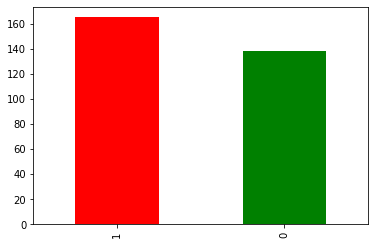

In [20]:
data['target'].value_counts().plot(kind='bar', color=['red','green']);

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
# Are there any missing values?
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
# Getting the descriptional statistics of the numerical features/components of our dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Compare Different Columns to **THE TARGET** to get isnights and and figure out the patterns

In [25]:
# Heart Disease distribution in relation to gender

data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [26]:
# Compare target column with sex column

pd.crosstab(data['target'], data['sex'])

NumExpr defaulting to 4 threads.


sex,0,1
target,,
0,24,114
1,72,93


    From the data, a woman has approximately 75% of being heart diseased (72/96)
    From the data also, there's a 50% of a male being heart diseased (93/207)
    while there is a 62.5% chance of anyone being heart diseased ((50+75)/200)

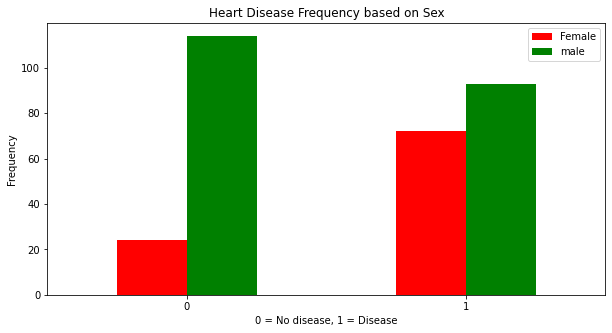

In [33]:
# Creating a visualization for our crosstabs for graphical explaation

pd.crosstab(data['target'], data['sex']).plot(kind='bar', figsize=(10,5), color=['red', 'green']);


plt.title('Heart Disease Frequency based on Sex')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('Frequency')
plt.legend(['Female', 'male']);
plt.xticks(rotation=0);

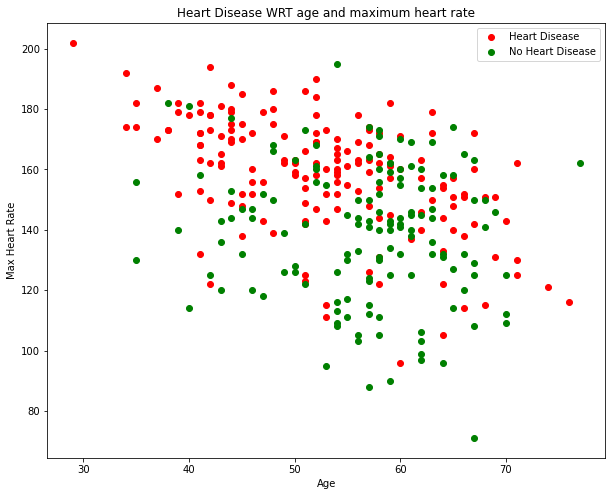

In [46]:
# Age Column in comparison with maximum heart rate WRT the target colum- thalac

# Create a plot figure
plt.figure(figsize=(10,8))

# Scatter plot for those ages with disease
plt.scatter(data.age[data.target==1], data.thalach[data.target==1],c='red')

# Scatter plot for those ages without disease
plt.scatter(data.age[data.target==0], data.thalach[data.target==0],c='green')

# Plot info
plt.title('Heart Disease WRT age and maximum heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Heart Disease', 'No Heart Disease']);

### Downward slope showing how the max heart rate reduces with age

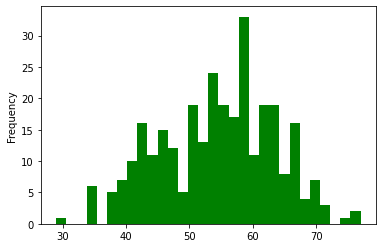

In [73]:
# Checking the distribution or spread of the ages 
data.age.plot.hist(bins=30, color='green');

### The Age column is a Normal (Gaussian) Distribution skewed to the right.

In [51]:
# Heart Disease Frequency WRT to Chest Pain

pd.crosstab(data['cp'], data['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


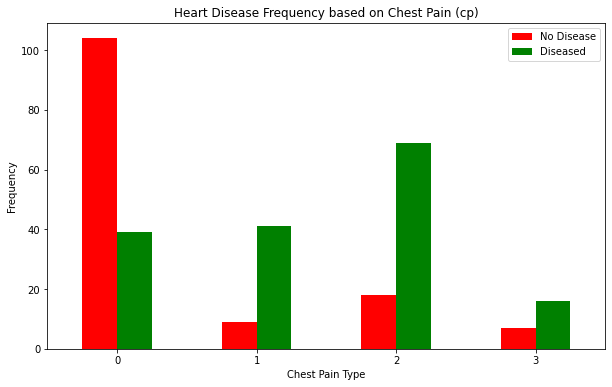

In [54]:
# Visualizing the Crosstab
pd.crosstab(data['cp'], data['target']).plot(kind='bar',figsize=(10,6), color=['red','green'])

plt.title('Heart Disease Frequency based on Chest Pain (cp)')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend(['No Disease', 'Diseased'])
plt.xticks(rotation=0);

### Generate a Corellation Matrix
        Correlation Matrix shows us how all of the columns relate to each other excluding NAs and NULLs

In [55]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
slope,-0.168814,-0.030711,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877
ca,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,0.222682,-0.080155,1.000000,0.151832,-0.391724
thal,0.068001,0.210041,-0.161736,0.062210,0.098803,-0.032019,-0.011981,-0.096439,0.206754,0.210244,-0.104764,0.151832,1.000000,-0.344029


### We make the visulaization of the correlation matrix more beautiful using Seaborn's `heatmap`

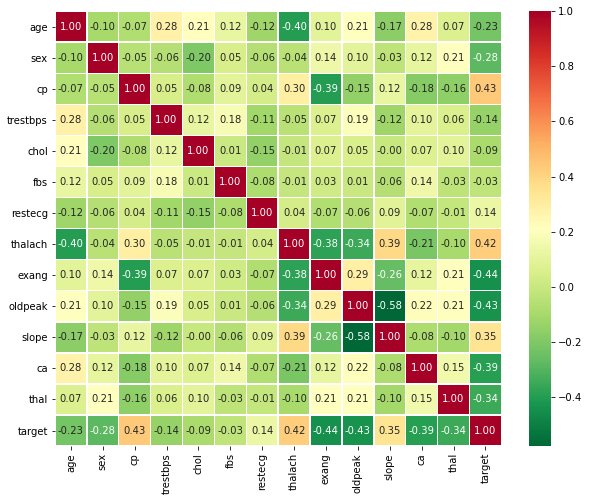

In [61]:
corr_mat = data.corr()

fig, ax = plt.subplots(figsize=(10,8))

ax = sns.heatmap(corr_mat, annot=True, linewidths=0.5, fmt = '.2f', cmap='RdYlGn_r')

## 5.0 Machine Learning Modelling

> Having done a handful of exploration and experimentation, I head to the modelling aspect bearing in mind that I need nothing less than a 95% accuracy.

    We use the independent variables to predict the dependent vaariables or target columns - a binary classification excercise

In [63]:
# We view the head of our data again
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
# Splitting the into X and y
    
X = data.drop('target', axis=1)

y = data['target']

In [66]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [67]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [68]:
# Splitting into train and test sets

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [70]:
len(X_train)

242

In [71]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

In [72]:
len(y_train)

242

##### Note : X_train and y_train are of same length

    Remember, I will be trying three diffrent Machine Learning models:
    1. Logistic Regression
    2. K Neighbours Classifier
    3. Random Forests Classifier
    
    According to the Sklearn Machine Learning Map.

In [77]:
# Put models in a dictioary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given Machine Learning models.
    Where models : a dictionary of given Machine Learning models
    
    X_train : Features training set
    y_train : label training set
    X_test : Features test set
    y_test : labels test set
    """
    
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep models scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [79]:
model_scores = fit_and_score(models=models, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

model_scores

C:\Users\JohnIgoche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### These are the baseline scores for our models, without tuning.

### Compare Models Graphically

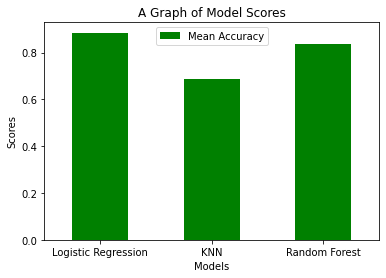

In [96]:
# Make a Dataframe of the model_scores and plot
models_compare = pd.DataFrame(model_scores, index=['Mean Accuracy'])

models_compare.T.plot.bar(color=['green'])

# Add aesthetics

plt.title('A Graph of Model Scores')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.legend();

#### At this point I might just decide to do away with the KNN model.

#### The Scores above are only baseline scores and as such I cannot take these as final, we might have to do the following;

    - Hyperparameter Tuning.
    - Feature Importance
    - Confusion Matrix
    - Cross Validation
    - Precsion Score
    - F1 Score
    - Recall Score
    - ROC Curve
    - Area Under ROC Curve (AUC)
    - Classification Report
    

#### a) Hyperparameter Tuning

In [106]:
# KNN Tuning
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21,1)

# Instantiate KNeigbors
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorthm
    knn.fit(X_train, y_train)
    
    # Update training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores lsit 
    test_scores.append(knn.score(X_test, y_test))

In [107]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [108]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maxim score on the train data : 100.00%
Maxim score on the test data : 75.41%


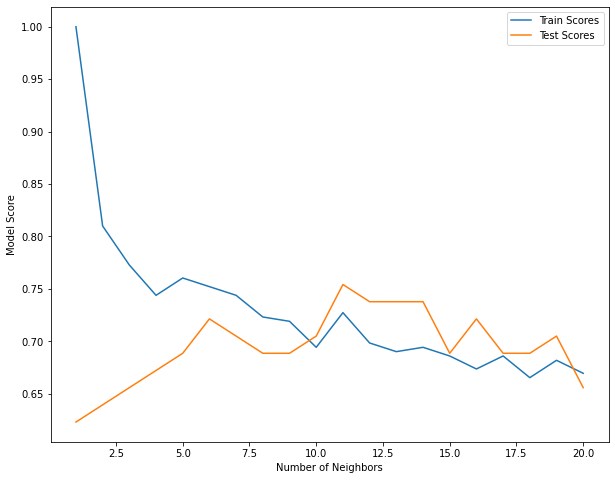

In [118]:
figKnn = plt.figure(figsize=(10,8))
figKnn
plt.plot(neighbors, train_scores, label='Train Scores')
plt.plot(neighbors, test_scores, label='Test Scores')
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend();


print(f"Maxim score on the train data : {max(train_scores)*100:.2f}%")
print(f"Maxim score on the test data : {max(test_scores)*100:.2f}%")

figKnn.savefig('KNN Heart Disease NNeighbors Comparison.png')